In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
import pandas as pd
import cv2
import sys
import re
from datetime import datetime as dt
import time
import scipy.ndimage as ndi 
sys.path.append('/Users/yves/Documents/Code/mec_ephys/packages')


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
n_bytes = 66257620992

In [36]:
samples_offset = (n_bytes/2/384)

In [2]:
from mecll.rsync import Rsync_aligner


In [47]:
root_path = '/Users/yves/Downloads/example_files2_wOF/'
all_fs = os.listdir(root_path)
position = np.load(os.path.join(root_path,[i for i in os.listdir(root_path) if '_positions.npy' in i][0]))


sync_path_spk = os.path.join(root_path,[i for i in all_fs if i=='timestamps_OF.npy'][0])#'/Users/yves/Downloads/example_files/timestamps.npy'
sync_messages_spk = np.load(sync_path_spk)[::2][:-1].astype('float')


(0, 3000)

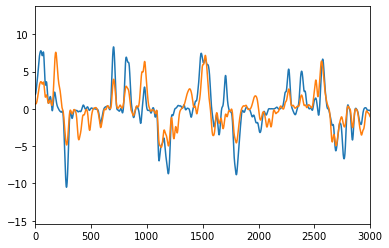

In [16]:
plt.plot(delta_p[:,0])
plt.plot(ndi.gaussian_filter1d(delta_p,8)[:,0])
plt.xlim(0,3000)

In [17]:
np.where(np.all(np.logical_not(np.isfinite(position)),axis=1))[0]

array([ 1178,  1180,  1181, ..., 64226, 64227, 64228])

([<matplotlib.axis.XTick at 0x7f8d547c8a90>,
 <a list of 10 Text xticklabel objects>)

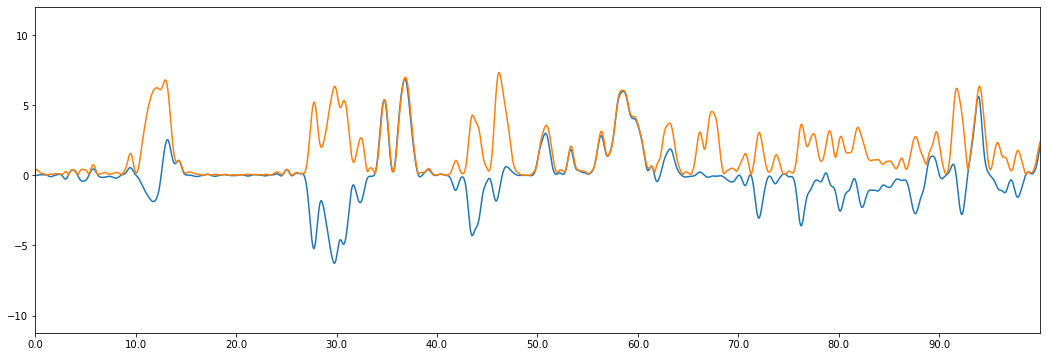

In [18]:
plt.figure(figsize=(18,6))
#position[np.logical_not(np.isfinite(position[:,0])),:] = 0
delta_p = (position[1:] - position[:-1])
delta_p[np.logical_not(np.isfinite(delta_p[:,0])),:] = 0
delta_p[np.sum(np.abs(delta_p),axis=1)>20,:] = 0
#delta_p[np.sum(np.abs(delta_p),axis=1)<2,:] = 0

delta_p = ndi.gaussian_filter1d(delta_p,8,axis=0)
#delta_p[]
speed = np.concatenate([[0],np.sqrt(np.sum(delta_p**2,axis=1))])
plt.plot(delta_p[:,0])
plt.plot(speed)

#plt.plot(ndi.gaussian_filter1d(delta_p[:,0],7))

plt.xlim(0,3000)
plt.xticks(np.arange(0,3000,300),np.arange(0,3000,300)/30.)
#plt.ylim(-10,10)

In [19]:
delta_p

array([[-0.02121141, -0.43313798],
       [-0.01959629, -0.4301009 ],
       [-0.01645743, -0.42398362],
       ...,
       [ 1.23222098,  0.79499693],
       [ 1.25302236,  0.80422709],
       [ 1.26359571,  0.80894171]])

In [20]:
np.unique(speed)

array([0.00000000e+00, 1.67295813e-05, 2.73677685e-05, ...,
       1.09513773e+01, 1.09599183e+01, 1.09750732e+01])

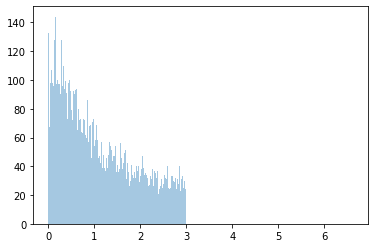

In [21]:
seaborn.distplot(speed[np.isfinite(speed)]*30/10,kde=0,bins=np.linspace(0,3,num=500))


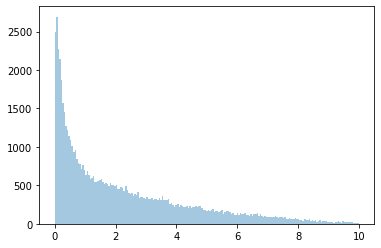

In [22]:
#speed = ndi.gaussian_filter1d(np.concatenate([[0],np.sqrt(np.sum((position[1:] - position[:-1])**2,axis=1))]),5)
seaborn.distplot(speed[np.isfinite(speed)],kde=0,bins=np.linspace(0,10,num=200))
#plt.xlim(0,100)

In [23]:
clr_ = seaborn.color_palette('RdBu_r',n_colors=len(position[:,0]))

In [24]:
for i in range(1,position.shape[0]):
    if np.abs(position[i-1,:]-position[i]).sum()>100:
        position[i] = position[i-1]

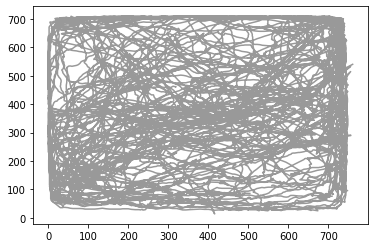

In [25]:
n_ = 1
#plt.scatter(position[::n_,0],position[::n_,1],c=clr_,s=8,alpha=1)
plt.plot(position[speed>2,0],position[speed>2,1],color='k',alpha=.4)


In [26]:
position

array([[719. ,  52. ],
       [720. ,  51.5],
       [718. ,  53. ],
       ...,
       [264. , 623. ],
       [265. , 624. ],
       [268. , 625. ]])

In [27]:
ixs = np.where(np.all(np.isfinite(position),axis=1))[0]
out = np.histogram2d(position[ixs,0],position[ixs,1],bins=90)

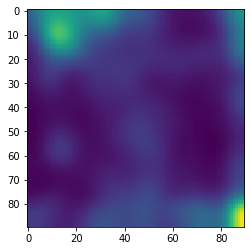

In [28]:
plt.imshow(ndi.gaussian_filter(out[0],5))

In [29]:
plt.imshow(occupancy_arr)

NameError: name 'occupancy_arr' is not defined

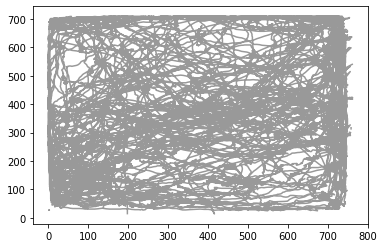

In [30]:
n_ = 5
#plt.scatter(position[::n_,0],position[::n_,1],c=clr_,s=8,alpha=1)
plt.plot(position[:,0],position[:,1],color='k',alpha=.4)


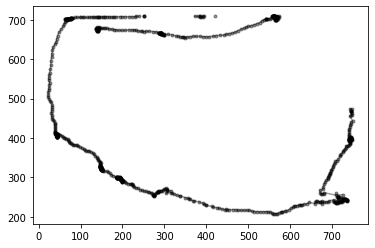

In [31]:
slc =  slice(1000,2000)
plt.plot(position[slc,0],position[slc,1],color='k',alpha=.4,marker='.')


In [39]:

#load spiking data
#ROOT = '/Users/yves/Downloads/example_files/'
spkT = np.load(os.path.join(root_path,[i for i in all_fs if i=='spike_times.npy'][0])).flatten()
spkC = np.load(os.path.join(root_path,[i for i in all_fs if i=='spike_clusters.npy'][0])).flatten()
cluster_labels = pd.read_table(os.path.join(root_path,[i for i in all_fs if '.tsv' in i][0]))


#select single units
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [40]:
import scipy as sp
import scipy.signal

In [41]:
np.mean(speed>5)

0.12863076946833646

In [42]:
cam_sync_path = os.path.join(root_path,[i for i in all_fs if ('OFB' in i and 'pinstate' in i)][0])
sync_df = pd.read_csv(cam_sync_path,header=None)
sync_messages_cam = np.where((sync_df[0].values[1:] - sync_df[0].values[:-1])<0)[0].astype('float')

In [43]:
len(sync_messages_cam)

429

In [44]:
len(sync_messages_spk)

539

In [48]:
#+86272944
aligner = Rsync_aligner(sync_messages_spk+samples_offset,sync_messages_cam,units_A=30/30000.,units_B=1)

In [49]:
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [50]:
from scipy.ndimage import gaussian_filter

In [51]:
def gaussian_kernel(win_size, sigma):
    t = np.arange(win_size)
    x, y = np.meshgrid(t, t)
    o = (win_size - 1) / 2
    r = np.sqrt((x - o)**2 + (y - o)**2)
    scale = 1 / (sigma**2 * 2 * np.pi)
    return scale * np.exp(-0.5 * (r / sigma)**2)

In [52]:
dd_ = 100
sigma= 25
g = gaussian_kernel(2*dd_,sigma)

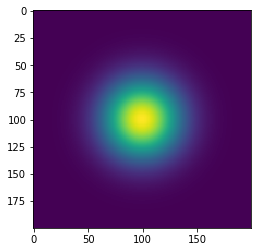

In [53]:
plt.imshow(g)

In [54]:
def get_half_split_maps(unit,spkT,spkC,aligner):
    """ divides the session into two halves and calculates 
    firing rate maps separately for each half. Also returns
    correlation between the two maps
    """

In [55]:
def get_rate_map(aligned_spike_times,position,start=None,end=None):
    resp_arr = np.zeros([1000,1000])
    if start is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times>start]
    if end is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times<start]

    for spk in aligned_spike_times:
        tmp_ = np.zeros([1000,1000])
        at_pos = position[i]
        xp,yp = at_pos.astype(int)
        #tmp_ = np.zeros([1000,1000])
        resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
    return resp_arr

In [56]:
def filter_nan_gaussian_david(arr, sigma):
    """Allows intensity to leak into the nan area.
    According to Davids answer:
        https://stackoverflow.com/a/36307291/7128154
    """
    gauss = arr.copy()
    gauss[np.isnan(gauss)] = 0
    gauss = ndi.gaussian_filter(
            gauss, sigma=sigma, mode='constant', cval=0)

    norm = np.ones(shape=arr.shape)
    norm[np.isnan(arr)] = 0
    norm = ndi.gaussian_filter(
            norm, sigma=sigma, mode='constant', cval=0)

    # avoid RuntimeWarning: invalid value encountered in true_divide
    norm = np.where(norm==0, 1, norm)
    gauss = gauss/norm
    gauss[np.isnan(arr)] = np.nan
    return gauss

In [57]:
position.shape

(64759, 2)

In [62]:
def get_split_half_correlations(aligner,spkC,spkT,position,speed,SPEED_THRESH=2):
    
    #speed = np.concatenate([[0]*2,speed])
    n_timepoints = position.shape[0]
    half = int(np.floor(n_timepoints/2.))
    position1 = position[:half]
    position2 = position[half:]
    print(len(speed[:half]),len(position[:half]))
    
    ixs = np.where(np.logical_and(np.all(np.isfinite(position1),axis=1),speed[:half]>SPEED_THRESH))[0]
    occupancy_map1,_,_ = np.histogram2d(position1[ixs,0],position1[ixs,1],bins=np.linspace(0,780,num=51))
    
    ixs = np.where(np.logical_and(np.all(np.isfinite(position2),axis=1),speed[half:]>SPEED_THRESH))[0]
    occupancy_map2,_,_ = np.histogram2d(position2[ixs,0],position2[ixs,1],bins=np.linspace(0,780,num=51))
    
    
    ccs = []
    for unit_nr in single_units:
        sys.stdout.write('\r{}/{}'.format(unit_nr,single_units[-1]))
        spk_unit = spkT[np.where(spkC==unit_nr)[0]]


        aligned_T = aligner.A_to_B(spk_unit)
        #get the spikes that are in bounds for position encoding
        spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
        used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
        used_spikes = np.array([i for i in used_spikes if speed[i]>SPEED_THRESH])

        used_spikes_half1 = used_spikes[used_spikes<half]
        #print(used_spikes_half1)
        #break
        used_spikes_half2 = used_spikes[used_spikes>=half]

        if len(used_spikes_half1)>0 and len(used_spikes_half2)>0:
            posS = position[used_spikes_half1] 
            spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))

            norm_firing = spike_poss/occupancy_map1
            norm_smth_half1 = filter_nan_gaussian_david(norm_firing,2)
            norm_smth_half1[np.logical_not(np.isfinite(norm_smth_half1))] = 0
            #print(len(used_spikes_half2))
            #print(norm_smth.sum(),occupancy_map2.sum())
            #break

            posS = position[used_spikes_half2] 
            spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))
            norm_firing = spike_poss/occupancy_map2
            norm_smth_half2 = filter_nan_gaussian_david(norm_firing,2)
            norm_smth_half2[np.logical_not(np.isfinite(norm_smth_half2))] = 0
            ixs = np.logical_and(np.isfinite(norm_smth_half1.flatten()),
                                 np.isfinite(norm_smth_half2.flatten()))
            ccs.append(np.corrcoef(norm_smth_half1.flatten()[ixs],norm_smth_half2.flatten()[ixs])[0,1])
        else:
            ccs.append(np.nan)
    return np.array(ccs)


In [63]:
position[:5].shape

(5, 2)

In [64]:
ccs[134]

NameError: name 'ccs' is not defined

In [65]:
ccs = get_split_half_correlations(aligner,spkC,spkT,position,speed,SPEED_THRESH=5)

32379 32379
27/794

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


794/794

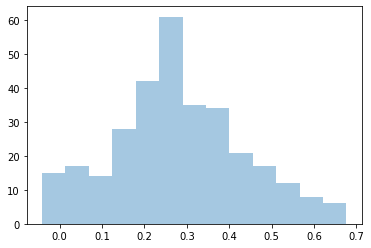

In [67]:
seaborn.distplot(ccs[np.isfinite(ccs)],kde=0)

In [68]:
all_resp_arr = []
SPEED_THRESH = 1
all_grid_scores = []

ixs = np.where(np.logical_and(np.all(np.isfinite(position),axis=1),
                              speed>SPEED_THRESH))[0]
occupancy_map,_,_ = np.histogram2d(position[ixs,0],position[ixs,1],bins=np.linspace(0,780,num=51))
#occupancy_map = filter_nan_gaussian_david(occupancy_map,3)
for unit_nr in single_units:
    spk_unit = spkT[np.where(spkC==unit_nr)[0]]


    aligned_T = aligner.A_to_B(spk_unit)
    #get the spikes that are in bounds for position encoding
    spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
    used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
    used_spikes = np.array([i for i in used_spikes if speed[i]>SPEED_THRESH])
    if len(used_spikes)>0:
        posS = position[used_spikes]
        tot_spikes = len(used_spikes)
        spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))

        norm_firing = spike_poss/occupancy_map
        norm_smth = filter_nan_gaussian_david(norm_firing,1.5)
        norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
        #all_grid_scores.append(get_grid_score(norm_smth))
        all_resp_arr.append([unit_nr,norm_smth,tot_spikes,np.max(norm_smth)*30])
    else:
        all_resp_arr.append([unit_nr,np.zeros([50,50]),0,0])

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [75]:
np.array(all_resp_arr).shape

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(313, 4)

In [117]:
grid_store = []
for unit in np.random.randint(0,275,7):#[148,132,134,113,123,267,275]:
    grid_store.append(filter_nan_gaussian_david(all_resp_arr[unit][1],.1).flatten())
grid_store = np.array(grid_store)

In [120]:

10/1000

0.01

In [137]:
def build_spike_array_direct(spkC,spkT,bin_size=10,sample_rate=30000):
    #maybe use sparse matrix here...
    n_bins_total = int(np.ceil((np.max(spkT)/30000) * (1000/bin_size)))
    n_cells_total = len(np.unique(spkC))
    spkT2 = ((spkT / 30000) * (1000/bin_size)).astype('')
    cell_array = np.zeros([n_cells_total,n_bins_total])
    for cell_ctr,cell_ix in enumerate(np.unique(spkC)[:5]):
        spk_inds = np.where(spkC==cell_ix)[0]
        t_,c = np.unique(spkT2[spk_inds],return_counts=True)
        cell_array[t_] = c
    return cell_array
        
    

In [138]:
cell_array = build_spike_array_direct(spkC,spkT,bin_size=10,sample_rate=30000)

IndexError: arrays used as indices must be of integer (or boolean) type

In [133]:
spkT2 = (spkT / 30000) * (1000/bin_size)

In [134]:
t,c = np.unique(spkT2,return_counts=1)

In [131]:
1000/30000 * 10

0.3333333333333333

In [127]:
bin_size=10
(np.max(spkT)/30000) * (1000/bin_size)

501193.07666666666

3000000

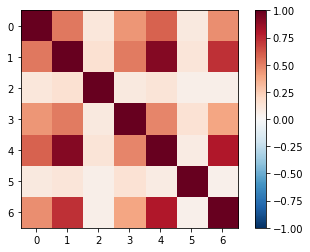

In [118]:
plt.imshow(np.corrcoef(grid_store),vmin=-1,vmax=1,cmap='RdBu_r')
plt.colorbar()

In [119]:
np.corrcoef(grid_store)

array([[1.        , 0.53095945, 0.11559561, 0.44000211, 0.5896388 ,
        0.09734607, 0.46254231],
       [0.53095945, 1.        , 0.1520002 , 0.5172811 , 0.91946769,
        0.12377378, 0.73320055],
       [0.11559561, 0.1520002 , 1.        , 0.09504262, 0.13060991,
        0.06056987, 0.06125124],
       [0.44000211, 0.5172811 , 0.09504262, 1.        , 0.48679217,
        0.14351875, 0.39821917],
       [0.5896388 , 0.91946769, 0.13060991, 0.48679217, 1.        ,
        0.08194621, 0.7968766 ],
       [0.09734607, 0.12377378, 0.06056987, 0.14351875, 0.08194621,
        1.        , 0.04950209],
       [0.46254231, 0.73320055, 0.06125124, 0.39821917, 0.7968766 ,
        0.04950209, 1.        ]])

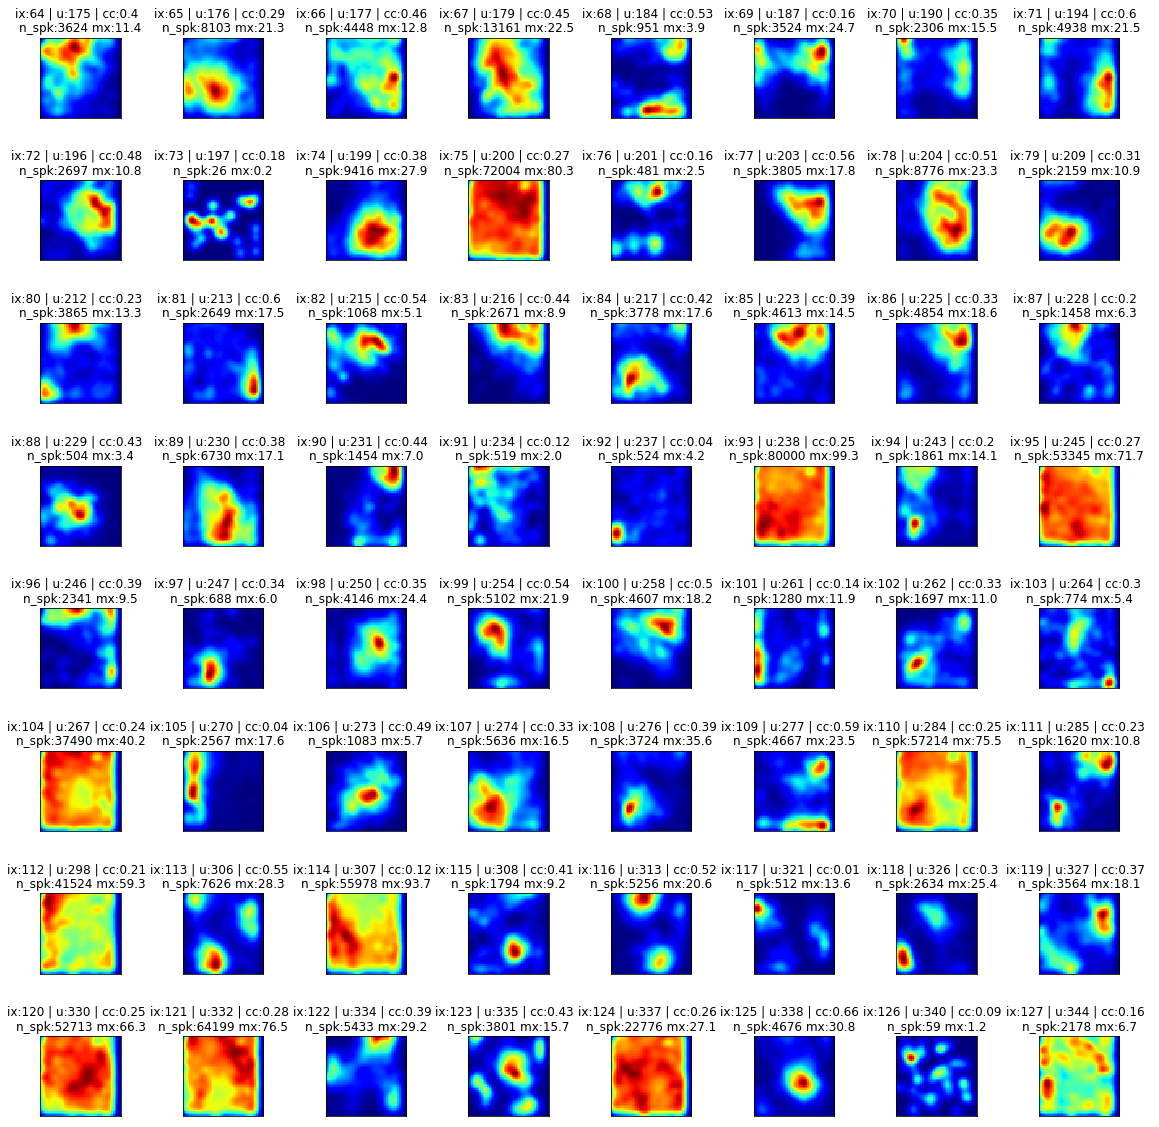

In [93]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 1

for ix in range(n64*64,(n64+1)*64):
    try:
        unit_nr,resp_map,tot,mx = all_resp_arr[ix]
        plt.subplot(8,8,kk)
        plt.title('ix:{} | u:{} | cc:{}  \nn_spk:{} mx:{}'.format(ix,unit_nr,np.round(ccs[ix],decimals=2),tot,np.round(mx,decimals=1)))
        #resp_map = 
        #resp_map[np.isnan(resp_map)] = 0
        plt.imshow(filter_nan_gaussian_david(resp_map,2),cmap='jet',interpolation='None')#,vmin=.0,vmax=.2)
        #plt.xlim(50,1050)
        #plt.ylim(50,1050)
        plt.xticks([])
        plt.yticks([])

        kk += 1
    except:
        break
plt.tight_layout()

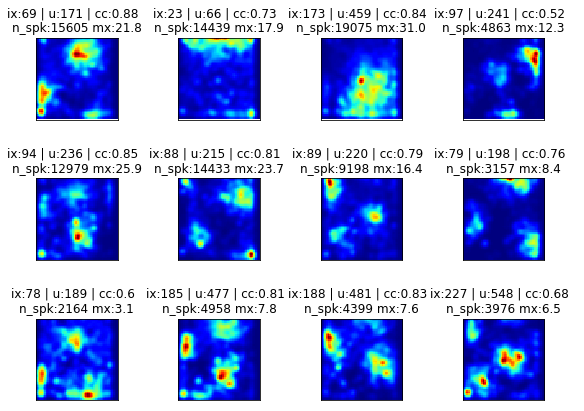

In [3438]:
plt.figure(figsize=(8,6))
kk = 1

n64 = 0
for ix in [69,23,173,97,94,88,89,79,78,185,188,227]:
    try:
        unit_nr,resp_map,tot,mx = all_resp_arr[ix]
        plt.subplot(3,4,kk)
        plt.title('ix:{} | u:{} | cc:{}  \nn_spk:{} mx:{}'.format(ix,unit_nr,np.round(ccs[ix],decimals=2),tot,np.round(mx,decimals=1)))
        #resp_map = 
        #resp_map[np.isnan(resp_map)] = 0
        plt.imshow(filter_nan_gaussian_david(resp_map,0),cmap='jet',interpolation='None')#,vmin=.0,vmax=.2)
        #plt.xlim(50,1050)
        #plt.ylim(50,1050)
        plt.xticks([])
        plt.yticks([])

        kk += 1
    except ValueError:
        break
plt.tight_layout()

In [3423]:
A = np.random.random(size=(20,20))
B = np.random.random(size=(20,20))

In [3424]:
C = A.dot(B) + A

In [3419]:
B2 = np.linalg.solve(A,C)

In [3428]:
np.allclose(A.dot((B + np.eye(A.shape[0]))),C)

True

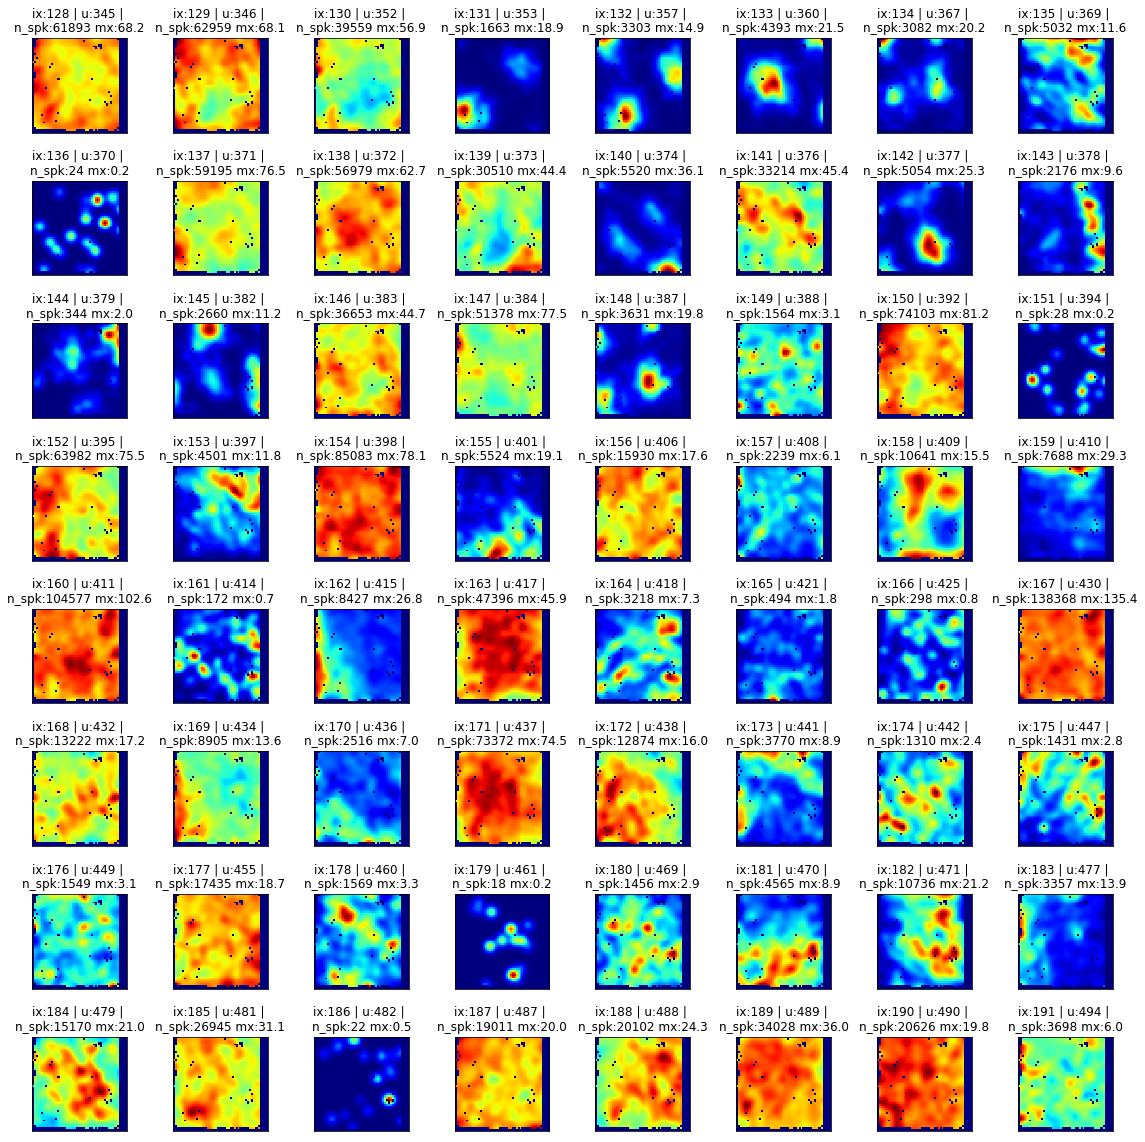

In [3009]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 2
for ix in range(n64*64,(n64+1)*64):
    try:
        unit_nr,resp_map,tot,mx = all_resp_arr[ix]
        plt.subplot(8,8,kk)
        plt.title('ix:{} | u:{} | \nn_spk:{} mx:{}'.format(ix,unit_nr,tot,np.round(mx,decimals=1)))
        #resp_map = 
        #resp_map[np.isnan(resp_map)] = 0
        plt.imshow(resp_map,cmap='jet',interpolation='None')#,vmin=.0,vmax=.2)
        #plt.xlim(50,1050)
        #plt.ylim(50,1050)
        plt.xticks([])
        plt.yticks([])

        kk += 1
    except ValueError:
        break
plt.tight_layout()

In [ ]:
get_rot_mtx = lambda x: np.array([[np.cos(x), -np.sin(x)],[np.sin(x),np.cos(x)]])

In [1785]:
r60 = get_rot_mtx(np.deg2rad(87))

In [1796]:
spk_unit = spkT[np.where(spkC==single_units[87])[0]]


aligned_T = aligner.A_to_B(spk_unit)
#get the spikes that are in bounds for position encoding
spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
used_spikes = np.array([i for i in used_spikes if speed[i]>SPEED_THRESH])
if len(used_spikes)>0:
    posS = position[used_spikes]
    tot_spikes = len(used_spikes)
    spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))

    norm_firing = (spike_poss/occupancy_map)[1:-4,1:-4]
    norm_smth = filter_nan_gaussian_david(norm_firing,3)
    norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
    all_resp_arr.append([norm_smth,tot_spikes*30/len(position),np.max(norm_smth)*30])
else:
    all_resp_arr.append([np.zeros([50,50]),0])

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [1797]:
sampled_pos = []
sampled_activity = []
for _ in range(2000):
    x,y = np.random.randint(0,50,2)
    activity = np.random.binomial(p=4*norm_smth[x,y],n=1)
    sampled_pos.append([x,y])
    sampled_activity.append(activity)


ValueError: p < 0, p > 1 or p is NaN

In [1798]:
sampled_pos = np.array(sampled_pos)
sampled_activity = np.array(sampled_activity)

In [1799]:
posS = sampled_pos[np.where(sampled_activity)[0]]
f,_,_ = np.histogram2d(posS[:,0],posS[:,1],np.arange(50))
f2,_,_ = np.histogram2d(sampled_pos[:,0],sampled_pos[:,1],np.arange(50))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


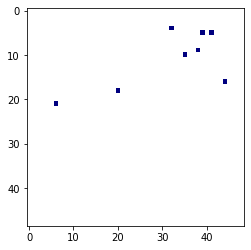

In [1800]:
plt.imshow(filter_nan_gaussian_david(f/f2,5),cmap='jet')

In [1801]:
sampled_pos.shape

(0,)

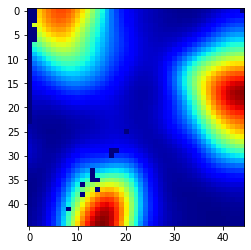

In [1802]:
plt.imshow(norm_smth,cmap='jet')

In [1803]:
def get_grid_score(norm_smth):
    acorr = sp.signal.correlate2d(norm_smth,norm_smth)
    #plt.imshow(acorr,cmap='jet',interpolation=None)
    out = rotated_acorrs(acorr,[60,120])
    cc1 = np.mean([np.corrcoef(acorr.flatten(),i.flatten())[0,1] for i in out])
    #np.mean(cc1)
    
    out = rotated_acorrs(acorr,[30,90,150])
    cc2 = np.mean([np.corrcoef(acorr.flatten(),i.flatten())[0,1] for i in out])
    #np.mean(cc2)
    return cc1 - cc2

In [1804]:
from scipy import interpolate
import numpy as np

def interpolate_missing_pixels(
        image: np.ndarray,
        mask: np.ndarray,
        method: str = 'nearest',
        fill_value: int = 0
):
    """
    :param image: a 2D image
    :param mask: a 2D boolean image, True indicates missing values
    :param method: interpolation method, one of
        'nearest', 'linear', 'cubic'.
    :param fill_value: which value to use for filling up data outside the
        convex hull of known pixel values.
        Default is 0, Has no effect for 'nearest'.
    :return: the image with missing values interpolated
    """
    from scipy import interpolate

    h, w = image.shape[:2]
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))

    known_x = xx[~mask]
    known_y = yy[~mask]
    known_v = image[~mask]
    missing_x = xx[mask]
    missing_y = yy[mask]

    interp_values = interpolate.griddata(
        (known_x, known_y), known_v, (missing_x, missing_y),
        method=method, fill_value=fill_value
    )

    interp_image = image.copy()
    interp_image[missing_y, missing_x] = interp_values

    return interp_image

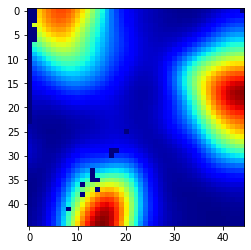

In [1805]:
plt.imshow(interpolate_missing_pixels(norm_smth,mask=np.isnan(norm_smth)),cmap='jet')

In [1806]:
x

12

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


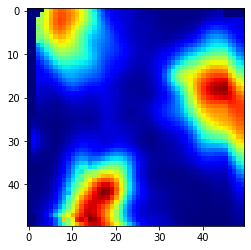

In [1834]:
norm_firing = (spike_poss/occupancy_map)
norm_smth = filter_nan_gaussian_david(norm_firing,2)
for x,y in zip(*np.where(np.isnan(norm_smth))):
    norm_smth[x,y] = np.nanmean(norm_smth[x-2:x+2,y-2:y+2])
#norm_smth = norm_smth[:,1:]
    #nans, x= nan_helper(norm_smth)

#norm_smth[nans]= np.interp(x(nans), x(~nans), norm_smth[~nans])
#norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
plt.imshow(norm_smth,cmap='jet')


In [1808]:
norm_smth.shape

(50, 50)

In [1809]:
>>> radius = 48
>>> a = np.zeros((100-1, 100-1)).astype('uint8')
>>> cx, cy = 50,50 # The center of circle
>>> y, x = np.ogrid[-radius: radius, -radius: radius]
>>> index = x**2 + y**2 <= radius**2
>>> a[cy-radius:cy+radius, cx-radius:cx+radius][index] = 1


radius = 18
>>> cx, cy = 50,50 # The center of circle
>>> y, x = np.ogrid[-radius: radius, -radius: radius]
>>> index = x**2 + y**2 <= radius**2
>>> a[cy-radius:cy+radius, cx-radius:cx+radius][index] = 0


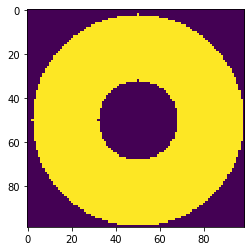

In [1810]:
plt.imshow(a)

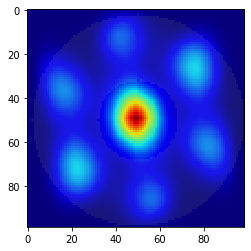

In [1811]:
acorr = sp.signal.correlate2d(norm_smth,norm_smth,)
plt.imshow(acorr,cmap='jet',interpolation=None)
plt.imshow(a,alpha=.1)


In [1812]:
def rotated_acorrs(acorr,angles):
    return [
        ndi.interpolation.rotate(acorr, angle, reshape=False)
        for angle in angles
    ]


In [1826]:
np.corrcoef(out[1].flatten(),acorr.flatten())

array([[1.       , 0.9241141],
       [0.9241141, 1.       ]])

In [1814]:
a.shape

(99, 99)

In [1815]:
acorr = np.ma.masked_array(acorr,a)

In [1828]:
out = rotated_acorrs(acorr,[60,120])
cc1 = [np.corrcoef(acorr[a].flatten(),i[a].flatten())[0,1] for i in out]
np.mean(cc1)

0.7414567975036356

In [1829]:
[np.corrcoef(acorr[a].flatten(),i[a].flatten())[0,1] for i in out]

[0.7906619947075034, 0.6922516002997677]

In [1821]:
cc1

[0.7906619947075034, 0.6922516002997677]

In [1831]:
out = rotated_acorrs(acorr,[30,90,150])
cc1 = [np.corrcoef(acorr.flatten(),i.flatten())[0,1] for i in out]
np.mean(cc2)

0.8593153755243934

In [1818]:
aligner.A_to_B(np.array([65124.,65124.]))

array([615.83371465, 615.83371465])

In [1275]:
all_resp_arr = []
n_ = 9
out_ctr = 0
ctr = 0
for unit in single_units:#[n_:n_+1]:
    ctr += 1
    spk_unit = spkT[np.where(spkC==unit)[0]]
    
    
    aligned_T = aligner.A_to_B(spk_unit)
    #get the spikes that are in bounds for position encoding
    spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
    used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
    resp_arr = np.zeros([1000,1000])
    
    for i in used_spikes:#[int(len(used_spikes)/2):]:
        try:
            tmp_ = np.zeros([1000,1000])
            at_pos = position[i]
            if speed[i]>2:
                xp,yp = at_pos.astype(int)
                #tmp_ = np.zeros([1000,1000])
                resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
                #tmp_ = gaussian_filter(tmp_,[10,10])
                #resp_arr += tmp_
            #mu = at_pos
            #d = ((np.dstack([x,y]) - mu[None,None,:])**2).sum(axis=2)
            #g = np.exp(-( (d)**2 / ( 2.0 * sigma**2 ) ) )
            #resp_arr += g
            #resp_arr[xp-1dd_:xp+1dd_,yp-1dd_:yp+1dd_] += g
        except Exception as e:
            if e==KeyboardInterrupt:
                break
            else:
                out_ctr += 1
                pass
    print('ctr:{}  | unit:{}  |  n_spikes:{}  | FR:{:.2f} | n_out_of_bounds:{}  | mu_T:{:.2f}'
          .format(ctr,unit,len(spks_unit_in_bounds),30*len(spks_unit_in_bounds)/(len(position)),out_ctr,np.mean(spk_unit)/30000.))
    all_resp_arr.append(resp_arr.copy())

ctr:1  | unit:4  |  n_spikes:12948  | FR:3.10 | n_out_of_bounds:886  | mu_T:2076.24
ctr:2  | unit:7  |  n_spikes:40660  | FR:9.74 | n_out_of_bounds:4003  | mu_T:2104.48
ctr:3  | unit:10  |  n_spikes:412  | FR:0.10 | n_out_of_bounds:4005  | mu_T:2587.77
ctr:4  | unit:12  |  n_spikes:1325  | FR:0.32 | n_out_of_bounds:4031  | mu_T:2127.39
ctr:5  | unit:13  |  n_spikes:19467  | FR:4.67 | n_out_of_bounds:5484  | mu_T:2411.13
ctr:6  | unit:18  |  n_spikes:19011  | FR:4.56 | n_out_of_bounds:6609  | mu_T:2062.84
ctr:7  | unit:20  |  n_spikes:135038  | FR:32.36 | n_out_of_bounds:18832  | mu_T:2083.21
ctr:8  | unit:21  |  n_spikes:1627  | FR:0.39 | n_out_of_bounds:18889  | mu_T:2108.48
ctr:9  | unit:27  |  n_spikes:609  | FR:0.15 | n_out_of_bounds:18924  | mu_T:2026.44
ctr:10  | unit:29  |  n_spikes:37  | FR:0.01 | n_out_of_bounds:18927  | mu_T:2258.67
ctr:11  | unit:31  |  n_spikes:5504  | FR:1.32 | n_out_of_bounds:19330  | mu_T:2146.61


KeyboardInterrupt: 

In [346]:
def get_occupancy_map(position,speed,sigma=25,dd_=100,tot_pix_size=[1000,1000],speed_thresh=2):
    occupancy_arr = np.zeros([1000,1000])
    g = gaussian_kernel(2*dd_,sigma)
    len_pos = len(position)
    for ctr,i in enumerate(position):
        if speed[ctr]>speed_thresh:
            if np.remainder(ctr,10)==0:
                sys.stdout.write('\rframe:{:.2f}/{:.2f}'.format(ctr,len_pos))
                sys.stdout.flush()
            try:
                xp, yp = i.astype(int)
                #tmp_ = np.zeros([1000,1000])
                #tmp_[xp,yp] += g
                #tmp_ = gaussian_filter(tmp_,[10,10])}
                occupancy_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
            #occupancy_arr += g
            except:
                pass   
    return occupancy_arr

In [347]:
half = int(position.shape[0]/2)
occ_map_first_half = get_occupancy_map(position[:half],speed[:half])
occ_map_second_half = get_occupancy_map(position[half:],speed[half:])

frame:34050.00/34667.00

In [316]:
occupancy_arr = np.zeros([1000,1000])

len_pos = len(position)
for ctr,i in enumerate(position):
    if speed[ctr]>2:
        if np.remainder(ctr,10)==0:
            sys.stdout.write('\rframe:{:.2f}/{:.2f}'.format(ctr,len_pos))
            sys.stdout.flush()
        try:
            xp, yp = i.astype(int)
            #tmp_ = np.zeros([1000,1000])
            #tmp_[xp,yp] += g
            #tmp_ = gaussian_filter(tmp_,[10,10])}
            occupancy_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
        #occupancy_arr += g
        except:
            pass

frame:68720.00/69333.00

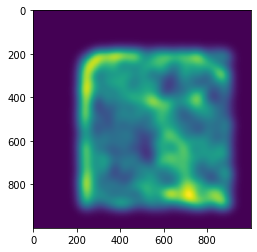

In [317]:
plt.imshow(occupancy_arr)

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


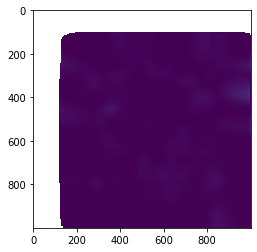

In [318]:
plt.imshow(resp_arr/occupancy_arr)

In [319]:
from numpy.fft import fft, ifft, fftshift

def xcorr(x):
    l = 2 ** int(np.log2(x.shape[1] * 2 - 1))
    fftx = fft(x, n = l, axis = 1)
    ret = ifft(fftx * np.conjugate(fftx), axis = 1)
    ret = fftshift(ret, axes=1)
    return ret

In [320]:
import numpy
from numpy.fft import fft, ifft

data = (arr/occupancy_arr)[100:600,100:600]
#rint data
##[[ 0  1  2  3]
## [ 4  5  6  7]
## [ 8  9 10 11]
## [12 13 14 15]
## [16 17 18 19]]
dataFT = fft(data, axis=1)
dataAC = ifft(dataFT * numpy.conjugate(dataFT), axis=1).real


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [321]:
#out = xcorr((arr/occupancy_arr)[100:600,100:600])

In [322]:
143

143

In [323]:
len(all_resp_arr)

286

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


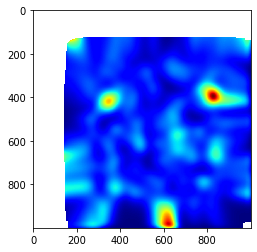

In [337]:
arr =all_resp_arr[17]
resp_map = gaussian_filter(arr/occupancy_arr,12,mode='constant',truncate=2)
plt.imshow(resp_map,cmap='jet')

In [338]:
from scipy.ndimage import convolve
resp_map_downsampled = convolve(resp_map, 
                 np.array([[0.25,0.25]*4,[0.25,0.25]*4]))[:resp_map.shape[0]:8,:resp_map.shape[1]:8]


In [339]:
import scipy.signal

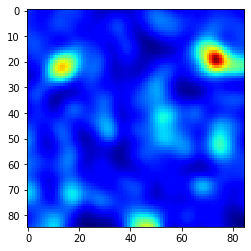

In [340]:
plt.imshow(resp_map_downsampled[30:-10,30:-10],cmap='jet')

In [343]:
out  = scipy.signal.correlate2d(resp_map_downsampled[30:-10,30:-10],resp_map_downsampled[30:-10,30:-10]

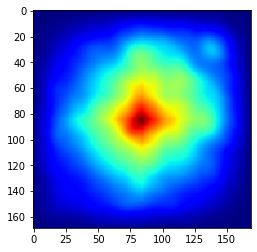

In [344]:
plt.imshow(out,cmap='jet')

In [330]:
scipy.cross

<function numpy.cross(a, b, axisa=-1, axisb=-1, axisc=-1, axis=None)>

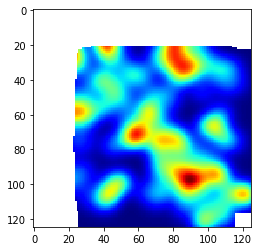

In [331]:
plt.imshow(resp_map_downsampled,cmap='jet')

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


IndexError: list index out of range

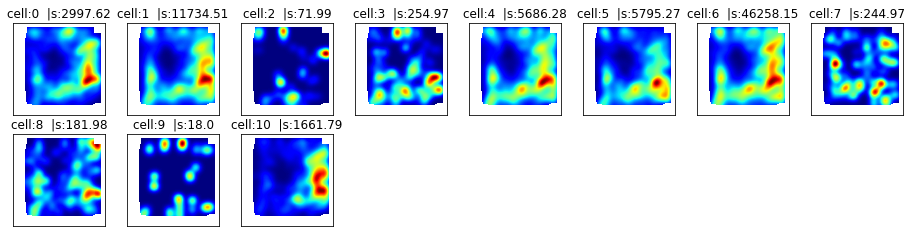

In [1277]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 0
for ix in range(n64*64,(n64+1)*64):
    arr = all_resp_arr[ix]
    plt.subplot(8,8,kk)
    plt.title('cell:{}  |s:{}'.format(ix,np.round(np.sum(arr),decimals=2)))
    resp_map = gaussian_filter(arr/occupancy_arr,30,mode='constant',truncate=2)
    #resp_map[np.isnan(resp_map)] = 0
    plt.imshow(resp_map,cmap='jet')#,vmin=.0,vmax=.2)
    plt.xlim(50,1050)
    plt.ylim(50,1050)
    plt.xticks([])
    plt.yticks([])

    kk += 1

In [248]:
M = gaussian_filter((all_resp_arr[12]/occupancy_arr),22,mode='constant',truncate=2)
M = M[165:-50,165:-50]
#M = np.pad(M,200)
out = get_autocorrelation(M)
plt.subplot(1,2,1)
plt.imshow(M,cmap='jet')
plt.subplot(1,2,2)
plt.imshow(out,cmap='jet')

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


NameError: name 'get_autocorrelation' is not defined

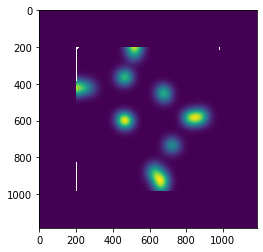

In [249]:
plt.imshow(np.pad(M,200))

# Check half split

In [348]:
def get_rate_map(aligned_spike_times,speed,position,dd_=100,sigma=25,start=None,end=None,speed_thresh=2):
    resp_arr = np.zeros([1000,1000])
    g = gaussian_kernel(2*dd_,sigma)
    print(g.shape)
    err_ctr = 0

    if start is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times>start]
    if end is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times<end]

    for spk in aligned_spike_times[20:]:
        try:
            tmp_ = np.zeros([1000,1000])
            at_pos = position[spk]
            
            xp,yp = at_pos.astype(int)
            #tmp_ = np.zeros([1000,1000])
            #print(resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_].shape,g.shape,at_pos)
            if speed[spk]>speed_thresh:
                resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
        except ValueError:
            pass
            err_ctr += 1
    print(err_ctr,len(aligned_spike_times))
    return resp_arr

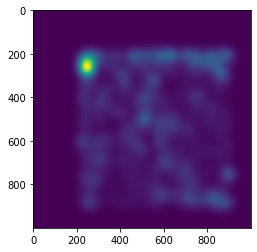

In [294]:
plt.imshow(occ_map_second_half)

In [295]:
used_spikes[used_spikes<half_time].shape

(522,)

In [349]:
half_time = int(position.shape[0]/2)
occ_map_first_half = get_occupancy_map(position[:half_time],speed[:half_time])
occ_map_second_half = get_occupancy_map(position[half_time:],speed[half_time:])

frame:34050.00/34667.00

In [2676]:
unit = single_units[73]
spk_unit = spkT[np.where(spkC==unit)[0]]


aligned_T = aligner.A_to_B(spk_unit)
#get the spikes that are in bounds for position encoding
spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
used_spikes = aligned_T[spks_unit_in_bounds].astype('int')


a1 = get_rate_map(used_spikes,speed,position,end=half_time)
a2 = get_rate_map(used_spikes,speed,position,start=half_time)

ValueError: operands could not be broadcast together with shapes (4262,) (98011,2) 

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


([], <a list of 0 Text yticklabel objects>)

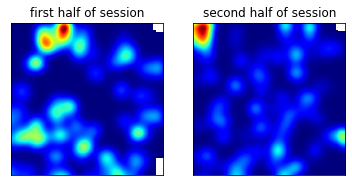

In [357]:
#a2 = all_resp_arr[16]
plt.subplot(1,2,1)
plt.title('first half of session')
M = gaussian_filter(a2/occ_map_second_half,20,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.title('second half of session')
M = gaussian_filter(a1/occ_map_first_half,20,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xticks([])
plt.yticks([])

In [191]:
t1_ = gaussian_filter((a2/occ_map_second_half).flatten(),32)
t2_ = gaussian_filter((a1/occ_map_first_half).flatten(),32)
ixs = np.logical_and(np.isfinite(t1_),np.isfinite(t2_))
np.corrcoef(t1_[ixs],t2_[ixs])[0,1]

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


0.24491664389439327

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


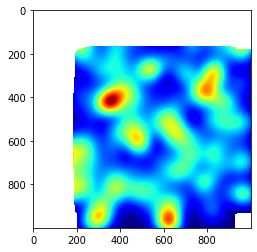

In [354]:
M = gaussian_filter(a1/occ_map_first_half,32,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')

In [3135]:
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Grid score calculations.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal


def circle_mask(size, radius, in_val=1.0, out_val=0.0):
  """Calculating the grid scores with different radius."""
  sz = [math.floor(size[0] / 2), math.floor(size[1] / 2)]
  x = np.linspace(-sz[0], sz[1], size[1])
  x = np.expand_dims(x, 0)
  x = x.repeat(size[0], 0)
  y = np.linspace(-sz[0], sz[1], size[1])
  y = np.expand_dims(y, 1)
  y = y.repeat(size[1], 1)
  z = np.sqrt(x**2 + y**2)
  z = np.less_equal(z, radius)
  vfunc = np.vectorize(lambda b: b and in_val or out_val)
  return vfunc(z)


class GridScorer(object):
  """Class for scoring ratemaps given trajectories."""

  def __init__(self, nbins, coords_range, mask_parameters, min_max=False):
    """Scoring ratemaps given trajectories.
    Args:
      nbins: Number of bins per dimension in the ratemap.
      coords_range: Environment coordinates range.
      mask_parameters: parameters for the masks that analyze the angular
        autocorrelation of the 2D autocorrelation.
      min_max: Correction.
    """
    self._nbins = nbins
    self._min_max = min_max
    self._coords_range = coords_range
    self._corr_angles = [30, 45, 60, 90, 120, 135, 150]
    # Create all masks
    self._masks = [(self._get_ring_mask(mask_min, mask_max), (mask_min,
                                                              mask_max))
                   for mask_min, mask_max in mask_parameters]
    # Mask for hiding the parts of the SAC that are never used
    self._plotting_sac_mask = circle_mask(
        [self._nbins * 2 - 1, self._nbins * 2 - 1],
        self._nbins,
        in_val=1.0,
        out_val=np.nan)

  def calculate_ratemap(self, xs, ys, activations, statistic='mean'):
    return scipy.stats.binned_statistic_2d(
        xs,
        ys,
        activations,
        bins=self._nbins,
        statistic=statistic,
        range=self._coords_range)[0]

  def _get_ring_mask(self, mask_min, mask_max):
    n_points = [self._nbins * 2 - 1, self._nbins * 2 - 1]
    return (circle_mask(n_points, mask_max * self._nbins) *
            (1 - circle_mask(n_points, mask_min * self._nbins)))

  def grid_score_60(self, corr):
    if self._min_max:
      return np.minimum(corr[60], corr[120]) - np.maximum(
          corr[30], np.maximum(corr[90], corr[150]))
    else:
      return (corr[60] + corr[120]) / 2 - (corr[30] + corr[90] + corr[150]) / 3

  def grid_score_90(self, corr):
    return corr[90] - (corr[45] + corr[135]) / 2

  def calculate_sac(self, seq1):
    """Calculating spatial autocorrelogram."""
    seq2 = seq1

    def filter2(b, x):
      stencil = np.rot90(b, 2)
      return scipy.signal.convolve2d(x, stencil, mode='full')

    seq1 = np.nan_to_num(seq1)
    seq2 = np.nan_to_num(seq2)

    ones_seq1 = np.ones(seq1.shape)
    ones_seq1[np.isnan(seq1)] = 0
    ones_seq2 = np.ones(seq2.shape)
    ones_seq2[np.isnan(seq2)] = 0

    seq1[np.isnan(seq1)] = 0
    seq2[np.isnan(seq2)] = 0

    seq1_sq = np.square(seq1)
    seq2_sq = np.square(seq2)

    seq1_x_seq2 = filter2(seq1, seq2)
    sum_seq1 = filter2(seq1, ones_seq2)
    sum_seq2 = filter2(ones_seq1, seq2)
    sum_seq1_sq = filter2(seq1_sq, ones_seq2)
    sum_seq2_sq = filter2(ones_seq1, seq2_sq)
    n_bins = filter2(ones_seq1, ones_seq2)
    n_bins_sq = np.square(n_bins)

    std_seq1 = np.power(
        np.subtract(
            np.divide(sum_seq1_sq, n_bins),
            (np.divide(np.square(sum_seq1), n_bins_sq))), 0.5)
    std_seq2 = np.power(
        np.subtract(
            np.divide(sum_seq2_sq, n_bins),
            (np.divide(np.square(sum_seq2), n_bins_sq))), 0.5)
    covar = np.subtract(
        np.divide(seq1_x_seq2, n_bins),
        np.divide(np.multiply(sum_seq1, sum_seq2), n_bins_sq))
    x_coef = np.divide(covar, np.multiply(std_seq1, std_seq2))
    x_coef = np.real(x_coef)
    x_coef = np.nan_to_num(x_coef)
    return x_coef

  def rotated_sacs(self, sac, angles):
    return [
        scipy.ndimage.interpolation.rotate(sac, angle, reshape=False)
        for angle in angles
    ]

  def get_grid_scores_for_mask(self, sac, rotated_sacs, mask):
    """Calculate Pearson correlations of area inside mask at corr_angles."""
    masked_sac = sac * mask
    ring_area = np.sum(mask)
    # Calculate dc on the ring area
    masked_sac_mean = np.sum(masked_sac) / ring_area
    # Center the sac values inside the ring
    masked_sac_centered = (masked_sac - masked_sac_mean) * mask
    variance = np.sum(masked_sac_centered**2) / ring_area + 1e-5
    corrs = dict()
    for angle, rotated_sac in zip(self._corr_angles, rotated_sacs):
      masked_rotated_sac = (rotated_sac - masked_sac_mean) * mask
      cross_prod = np.sum(masked_sac_centered * masked_rotated_sac) / ring_area
      corrs[angle] = cross_prod / variance
    return self.grid_score_60(corrs), self.grid_score_90(corrs), variance

  def get_scores(self, rate_map):
    """Get summary of scrores for grid cells."""
    sac = self.calculate_sac(rate_map)
    rotated_sacs = self.rotated_sacs(sac, self._corr_angles)

    scores = [
        self.get_grid_scores_for_mask(sac, rotated_sacs, mask)
        for mask, mask_params in self._masks  # pylint: disable=unused-variable
    ]
    scores_60, scores_90, variances = map(np.asarray, zip(*scores))  # pylint: disable=unused-variable
    max_60_ind = np.argmax(scores_60)
    max_90_ind = np.argmax(scores_90)

    return (scores_60[max_60_ind], scores_90[max_90_ind],
            self._masks[max_60_ind][1], self._masks[max_90_ind][1], sac)

  def plot_ratemap(self, ratemap, ax=None, title=None, *args, **kwargs):  # pylint: disable=keyword-arg-before-vararg
    """Plot ratemaps."""
    if ax is None:
      ax = plt.gca()
    # Plot the ratemap
    ax.imshow(ratemap, interpolation='none', *args, **kwargs)
    # ax.pcolormesh(ratemap, *args, **kwargs)
    ax.axis('off')
    if title is not None:
      ax.set_title(title)

  def plot_sac(self,
               sac,
               mask_params=None,
               ax=None,
               title=None,
               *args,
               **kwargs):  # pylint: disable=keyword-arg-before-vararg
    """Plot spatial autocorrelogram."""
    if ax is None:
      ax = plt.gca()
    # Plot the sac
    useful_sac = sac * self._plotting_sac_mask
    ax.imshow(useful_sac, interpolation='none', *args, **kwargs)
    # ax.pcolormesh(useful_sac, *args, **kwargs)
    # Plot a ring for the adequate mask
    if mask_params is not None:
      center = self._nbins - 1
      ax.add_artist(
          plt.Circle(
              (center, center),
              mask_params[0] * self._nbins,
              # lw=bump_size,
              fill=False,
              edgecolor='k'))
      ax.add_artist(
          plt.Circle(
              (center, center),
              mask_params[1] * self._nbins,
              # lw=bump_size,
              fill=False,
              edgecolor='k'))
    ax.axis('off')
    if title is not None:
      ax.set_title(title)

In [3136]:
def get_ring_mask(mask_min, mask_max):
    n_bins=50
    n_points = [n_bins * 2 - 1, n_bins * 2 - 1]
    return (circle_mask(n_points, mask_max * n_bins) *
            (1 - circle_mask(n_points, mask_min * n_bins)))


# Nolan lab github

In [3486]:
import numpy as np
import pandas as pd
#import array_utility
from skimage import measure
from scipy import misc
from scipy.ndimage import rotate
import matplotlib.pylab as plt


# shifts array by x and y
def get_shifted_map(firing_rate_map, x, y):
    shifted_map = shift_2d(firing_rate_map, x, 0)
    shifted_map = shift_2d(shifted_map, y, 1)
    return shifted_map


# remove from both where either of them is 0
def remove_zeros(array1, array2):
    array2 = np.nan_to_num(array2).flatten()
    array1 = np.nan_to_num(array1).flatten()
    array2_tmp = np.take(array2, np.where(array1 != 0))
    array1_tmp = np.take(array1, np.where(array2 != 0))
    array2 = np.take(array2_tmp, np.where(array2_tmp[0] != 0))
    array1 = np.take(array1_tmp, np.where(array1_tmp[0] != 0))
    return array1.flatten(), array2.flatten()


# remove from both where either of them is not a number (nan) - I am not proud of this, but nothing worked with np.nan
def remove_nans(array1, array2):
    array2 = array2.flatten()
    array2[np.isnan(array2)] = 666
    array1 = array1.flatten()
    array1[np.isnan(array1)] = 666
    array2_tmp = np.take(array2, np.where(array1 != 666))
    array1_tmp = np.take(array1, np.where(array2 != 666))
    array2 = np.take(array2_tmp, np.where(array2_tmp[0] != 666))
    array1 = np.take(array1_tmp, np.where(array1_tmp[0] != 666))
    return array1.flatten(), array2.flatten()



'''
The array is shifted along the x and y axes into every possible position where it overlaps with itself starting from
the position where the shifted array's bottom right element overlaps with the top left of the map. Correlation is
calculated for all positions and returned as a correlation_vector. TThe correlation vector is 2x * 2y.
'''

def get_rate_map_autocorrelogram(firing_rate_map):
    length_y = firing_rate_map.shape[0] - 1
    length_x = firing_rate_map.shape[1] - 1
    correlation_vector = np.empty((length_x * 2 + 1, length_y * 2 + 1)) * 0
    for shift_x in range(-length_x, length_x):
        for shift_y in range(-length_y, length_y):
            # shift map by x and y and remove extra bits
            shifted_map = get_shifted_map(firing_rate_map, shift_x, -shift_y)
            firing_rate_map_to_correlate, shifted_map = remove_zeros(firing_rate_map, shifted_map)

            correlation_y = shift_y + length_y
            correlation_x = shift_x + length_x

            if len(shifted_map) > 20:
                # np.corrcoef(x,y)[0][1] gives the same result for 1d vectors as matlab's corr(x,y) (Pearson)
                # https://stackoverflow.com/questions/16698811/what-is-the-difference-between-matlab-octave-corr-and-python-numpy-correlate
                correlation_vector[correlation_x, correlation_y] = np.corrcoef(firing_rate_map_to_correlate, shifted_map)[0][1]
            else:
                correlation_vector[correlation_x, correlation_y] = np.nan
    return correlation_vector


# they need to be the same size
def get_rate_map_crosscorrelogram(firing_rate_map1, firing_rate_map2):
    length_y = firing_rate_map1.shape[0] - 1
    length_x = firing_rate_map1.shape[1] - 1
    correlation_vector = np.empty((length_x * 2 + 1, length_y * 2 + 1)) * 0
    for shift_x in range(-length_x, length_x):
        for shift_y in range(-length_y, length_y):
            # shift map by x and y and remove extra bits
            shifted_map = get_shifted_map(firing_rate_map1, shift_x, -shift_y)
            firing_rate_map_to_correlate, shifted_map = remove_zeros(firing_rate_map2, shifted_map)

            correlation_y = shift_y + length_y
            correlation_x = shift_x + length_x

            if len(shifted_map) > 20:
                # np.corrcoef(x,y)[0][1] gives the same result for 1d vectors as matlab's corr(x,y) (Pearson)
                # https://stackoverflow.com/questions/16698811/what-is-the-difference-between-matlab-octave-corr-and-python-numpy-correlate
                correlation_vector[correlation_x, correlation_y] = np.corrcoef(firing_rate_map_to_correlate, shifted_map)[0][1]
            else:
                correlation_vector[correlation_x, correlation_y] = np.nan
    return correlation_vector


# make autocorr map binary based on threshold
def threshold_autocorrelation_map(autocorrelation_map):
    autocorrelation_map[autocorrelation_map > 0.2] = 1
    autocorrelation_map[autocorrelation_map <= 0.2] = 0
    return autocorrelation_map


# find peaks of autocorrelogram
def find_autocorrelogram_peaks(autocorrelation_map):
    autocorrelation_map_thresholded = threshold_autocorrelation_map(autocorrelation_map)
    autocorr_map_labels = measure.label(autocorrelation_map_thresholded)  # each field is labelled with a single digit
    field_properties = measure.regionprops(autocorr_map_labels)
    return field_properties


# calculate distances between the middle of the rate map autocorrelogram and the field centres
def find_field_distances_from_mid_point(autocorr_map, field_properties):
    distances = []
    mid_point_coord_x = np.ceil(autocorr_map.shape[0] / 2)
    mid_point_coord_y = np.ceil(autocorr_map.shape[1] / 2)

    for field in range(len(field_properties)):
        field_central_x = field_properties[field].centroid[0]
        field_central_y = field_properties[field].centroid[1]
        distance = np.sqrt(np.square(field_central_x - mid_point_coord_x) + np.square(field_central_y - mid_point_coord_y))
        distances.append(distance)
    return distances


'''
Grid spacing/wavelength:
Defined by Hafting, Fyhn, Molden, Moser, Moser (2005) as the distance from the central autocorrelogram peak to the
vertices of the inner hexagon in the autocorrelogram (the median of the six distances). This should be in cm.
'''


def calculate_grid_spacing(field_distances, bin_size):
    grid_spacing = np.median(field_distances) * bin_size
    return grid_spacing


'''
Defined by Wills, Barry, Cacucci (2012) as the square root of the area of the central peak of the autocorrelogram
divided by pi. (This should be in cm2.)
'''


def calculate_field_size(field_properties, field_distances, bin_size):
    central_field_index = np.argmin(field_distances)
    field_size_pixels = field_properties[central_field_index].area  # number of pixels in central field
    field_size = np.sqrt(field_size_pixels * np.squeeze(bin_size)) / np.pi
    return field_size


# https://stackoverflow.com/questions/481144/equation-for-testing-if-a-point-is-inside-a-circle
def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= radius ** 2


#  replace values not in the grid ring with nan
def remove_inside_and_outside_of_grid_ring(autocorr_map, field_properties, field_distances):
    ring_distances = get_ring_distances(field_distances)
    inner_radius = (np.mean(ring_distances) * 0.5) / 2
    outer_radius = (np.mean(ring_distances) * 2.5) / 2
    center_x = field_properties[np.argmin(field_distances)].centroid[0]
    center_y = field_properties[np.argmin(field_distances)].centroid[1]
    for row in range(autocorr_map.shape[0]):
        for column in range(autocorr_map.shape[1]):
            in_ring = in_circle(center_x, center_y, outer_radius, row, column)
            in_middle = in_circle(center_x, center_y, inner_radius, row, column)
            if not in_ring or in_middle:
                autocorr_map[row, column] = np.nan
    return autocorr_map


'''
Defined by Krupic, Bauza, Burton, Barry, O'Keefe (2015) as the difference between the minimum correlation coefficient
for autocorrelogram rotations of 60 and 120 degrees and the maximum correlation coefficient for autocorrelogram
rotations of 30, 90 and 150 degrees. This score can vary between -2 and 2, although generally values above
below -1.5 or above 1.5 are uncommon.
'''


# TODO this gives different results relative to the matlab script -  need to find out why
def calculate_grid_score(autocorr_map, field_properties, field_distances):
    correlation_coefficients = []
    for angle in range(30, 180, 30):
        autocorr_map_to_rotate = np.nan_to_num(autocorr_map)
        rotated_map = rotate(autocorr_map_to_rotate, angle, reshape=False)  # todo fix this
        rotated_map_binary = np.round(rotated_map)
        autocorr_map_ring = remove_inside_and_outside_of_grid_ring(autocorr_map, field_properties, field_distances)
        rotated_map_ring = remove_inside_and_outside_of_grid_ring(rotated_map_binary, field_properties, field_distances)
        autocorr_map_ring_to_correlate, rotated_map_ring_to_correlate = remove_nans(autocorr_map_ring, rotated_map_ring)
        pearson_coeff = np.corrcoef(autocorr_map_ring_to_correlate, rotated_map_ring_to_correlate)[0][1]
        correlation_coefficients.append(pearson_coeff)
    grid_score = min(correlation_coefficients[i] for i in [1, 3]) - max(correlation_coefficients[i] for i in [0, 2, 4])
    return grid_score


def get_ring_distances(field_distances_from_mid_point):
    field_distances_from_mid_point = np.array(field_distances_from_mid_point)[~np.isnan(field_distances_from_mid_point)]
    ring_distances = np.sort(field_distances_from_mid_point)[1:7]
    return ring_distances


def calculate_grid_metrics(autocorr_map, field_properties):
    bin_size = 2.5  # cm
    field_distances_from_mid_point = find_field_distances_from_mid_point(autocorr_map, field_properties)
    # the field with the shortest distance is the middle and the next 6 closest are the middle 6
    ring_distances = get_ring_distances(field_distances_from_mid_point)
    grid_spacing = calculate_grid_spacing(ring_distances, bin_size)
    field_size = calculate_field_size(field_properties, field_distances_from_mid_point, bin_size)
    grid_score = calculate_grid_score(autocorr_map, field_properties, field_distances_from_mid_point)
    return grid_spacing, field_size, grid_score


def process_grid_data(spatial_firing):
    rate_map_correlograms = []
    grid_spacings = []
    field_sizes = []
    grid_scores = []
    try:
        for ctr, (_,firing_rate_map,_,_) in enumerate(spatial_firing):
            #firing_rate_map = #cluster.firing_maps
            #sys.stdout.write('\r running cell: {}/{}'.format(ctr,len(spatial_firing)))
            #sys.stdout.flush()
            rate_map_correlogram = get_rate_map_autocorrelogram(firing_rate_map)
            rate_map_correlograms.append(np.copy(rate_map_correlogram))
            field_properties = find_autocorrelogram_peaks(rate_map_correlogram)
            if len(field_properties) > 7:
                grid_spacing, field_size, grid_score = calculate_grid_metrics(rate_map_correlogram, field_properties)
                grid_spacings.append(grid_spacing)
                field_sizes.append(field_size)
                grid_scores.append(grid_score)
            else:
                print('Not enough fields to calculate grid metrics.')
                grid_spacings.append(np.nan)
                field_sizes.append(np.nan)
                grid_scores.append(np.nan)
    except Exception as e:
        print(e)
        pass
    res = {}
    res['rate_map_autocorrelogram'] = rate_map_correlograms
    res['grid_spacing'] = grid_spacings
    res['field_size'] = field_sizes
    res['grid_score'] = grid_scores
    return res



In [3479]:
def get_rate_map_autocorrelogram(firing_rate_map):
    length_y = firing_rate_map.shape[0] - 1
    length_x = firing_rate_map.shape[1] - 1
    correlation_vector = np.empty((length_x * 2 + 1, length_y * 2 + 1)) * 0
    for shift_x in range(-length_x, length_x):
        for shift_y in range(-length_y, length_y):
            # shift map by x and y and remove extra bits
            shifted_map = get_shifted_map(firing_rate_map, shift_x, -shift_y).flatten()
            g_ixs = np.logical_and(firing_rate_map.flatten()!=0,shifted_map!=0)
            firing_rate_map_to_correlate, shifted_map = firing_rate_map.flatten()[g_ixs], shifted_map[g_ixs]

            correlation_y = shift_y + length_y
            correlation_x = shift_x + length_x

            if len(shifted_map) > 20:
                # np.corrcoef(x,y)[0][1] gives the same result for 1d vectors as matlab's corr(x,y) (Pearson)
                # https://stackoverflow.com/questions/16698811/what-is-the-difference-between-matlab-octave-corr-and-python-numpy-correlate
                correlation_vector[correlation_x, correlation_y] = np.corrcoef(firing_rate_map_to_correlate, shifted_map)[0][1]
            else:
                correlation_vector[correlation_x, correlation_y] = np.nan
    return correlation_vector

In [3487]:
rm = all_resp_arr[127][1]
ac_map2 = get_rate_map_autocorrelogram(np.array(rm))

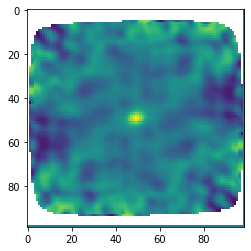

In [3485]:
plt.imshow(ac_map1)

In [3488]:
np.allclose(ac_map1,ac_map2)

False

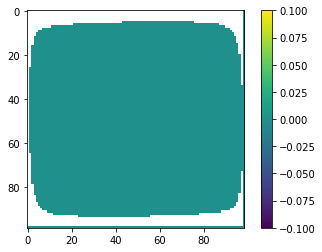

In [3498]:
plt.imshow((ac_map2-ac_map1))
plt.colorbar()

In [3501]:
np.all((ac_map2-ac_map1)[np.isfinite(ac_map2-ac_map1)]==0)

True

In [3502]:
np.where(np.isfinite(ac_map1))[0]==np.where(np.isfinite(ac_map2)[0])

array([[False, False, False, ...,  True,  True,  True]])

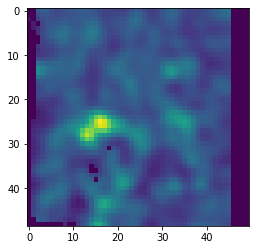

In [3472]:
plt.imshow(rm[:-2,])

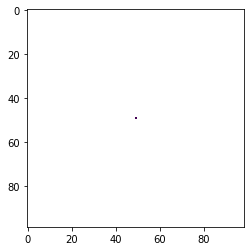

In [3473]:
plt.imshow(sp.signal.correlate2d(rm,rm.T,fillvalue=np.nan))

In [3458]:
np.array(all_resp_arr[114]).astype('float')

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: setting an array element with a sequence.

In [3139]:
out2 = process_grid_data(all_resp_arr[:40])

KeyboardInterrupt: 

In [ ]:
seaborn.distplot(np.array(out2['grid_score'])[np.isfinite(out2['grid_score'])],kde=0)

In [2192]:
np.nanmean(out2['grid_score']>.3)

TypeError: '>' not supported between instances of 'list' and 'float'

In [2193]:
out2['grid_score'] = np.array(out2['grid_score'])

In [2194]:
out2['grid_score'][np.isnan(out2['grid_score'])] = -100

In [2195]:
np.argsort(out2['grid_score'])[::-1]

array([ 9, 20,  0,  5, 29, 38, 12, 33, 17, 14,  8, 24, 23,  2, 37,  1,  6,
        4, 16, 22, 31, 32, 36, 25, 30,  3, 10, 18, 34, 11, 21, 19,  7, 26,
       28, 15, 13, 35, 39, 27])

In [1910]:
all_resp_arr[70]

[176, array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 6831, 19.14377356195839]

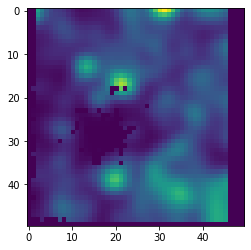

In [2197]:
plt.imshow(all_resp_arr[20][1])

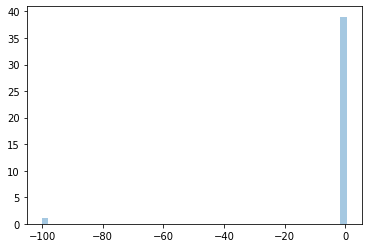

In [2198]:
seaborn.distplot(np.array(out2['grid_score'])[np.isfinite(out2['grid_score'])],kde=0)

In [2085]:
seaborn.distplot(np.array(out2['grid_spacing'])[out2['grid_score']>-10],kde=0,bins=30)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [3133]:


# https://stackoverflow.com/questions/30399534/shift-elements-in-a-numpy-array
def shift(array_to_shift, n):
    if n >= 0:
        return np.concatenate((np.full(n, np.nan), array_to_shift[:-n]))
    else:
        return np.concatenate((array_to_shift[-n:], np.full(-n, np.nan)))


'''
Shifts 2d array along given axis.
array_to_shift : 2d array that is to be shifted
n : array will be shifted by n places
axis : shift along this axis (should be 0 or 1)
'''

@jit(nopython=True)
def shift_2d(array_to_shift, n, axis):
    shifted_array = np.zeros_like(array_to_shift)
    if axis == 0:  # shift along x axis
        if n == 0:
            return array_to_shift
        if n > 0:
            shifted_array[:, :n] = 0
            shifted_array[:, n:] = array_to_shift[:, :-n]
        else:
            shifted_array[:, n:] = 0
            shifted_array[:, :n] = array_to_shift[:, -n:]

    if axis == 1:  # shift along y axis
        if n == 0:
            return array_to_shift
        elif n > 0:
            shifted_array[-n:, :] = 0
            shifted_array[:-n, :] = array_to_shift[n:, :]
        else:
            shifted_array[:-n, :] = 0
            shifted_array[-n:, :] = array_to_shift[:n, :]
    return shifted_array


def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.
    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
         # linear interpolation of NaNs
         nans, x= nan_helper(y)
         y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]


def remove_nans_from_both_arrays(array1, array2):
    not_nans_in_array1 = ~np.isnan(array1)
    not_nans_in_array2 = ~np.isnan(array2)
    array1 = array1[not_nans_in_array1 & not_nans_in_array2]
    array2 = array2[not_nans_in_array1 & not_nans_in_array2]
    return array1, array2


def remove_nans_and_inf_from_both_arrays(array1, array2):
    not_nans_in_array1 = ~np.isnan(array1)
    not_nans_in_array2 = ~np.isnan(array2)
    array1 = array1[not_nans_in_array1 & not_nans_in_array2]
    array2 = array2[not_nans_in_array1 & not_nans_in_array2]

    not_nans_in_array1 = ~np.isinf(array1)
    not_nans_in_array2 = ~np.isinf(array2)
    array1 = array1[not_nans_in_array1 & not_nans_in_array2]
    array2 = array2[not_nans_in_array1 & not_nans_in_array2]
    return array1, array2

In [1862]:
out = get_rate_map_autocorrelogram(norm_smth)

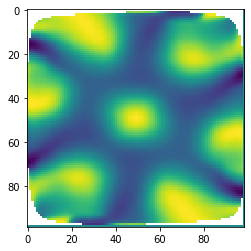

In [1863]:
plt.imshow(out)

In [1894]:
np.nanmax(out)

0.9999999999999998

In [1872]:
out.shape

(99, 99)

In [1890]:
acorr = sp.signal.correlate2d(norm_smth,norm_smth,boundary='fill',fillvalue=np.mean(norm_smth))


In [1895]:
np.nanmax(acorr)

112.05168842461892

In [2544]:
import numba
from numba import jit

In [3101]:
@jit(nopython=True)
def gaussian_kernel(kernx):
    kerny = np.exp(np.power(kernx, 2)/2 * (-1))
    return kerny

@numba.jit(nopython=True)
def calculate_firing_rate_for_cluster_parallel(spike_positions,smooth, positions_x, positions_y, number_of_bins_x, number_of_bins_y, bin_size_pixels, min_dwell, min_dwell_distance_pixels, dt_position_ms):
    """ This basically loops over all bins, calculates the distances from """
    spike_positions_x,spike_positions_y = spike_positions
    firing_rate_map = np.zeros((number_of_bins_x, number_of_bins_y))
    for x in range(number_of_bins_x):
        #print(x,number_of_bins_x)
        for y in range(number_of_bins_y):
            #print(x)
            px = x * bin_size_pixels + (bin_size_pixels / 2)
            py = y * bin_size_pixels + (bin_size_pixels / 2)
            spike_distances = np.sqrt(np.power(px - spike_positions_x, 2) + np.power(py - spike_positions_y, 2))
            #print(spike_distances)
            spike_distances = spike_distances[~np.isnan(spike_distances)]
            occupancy_distances = np.sqrt(np.power((px - positions_x), 2) + np.power((py - positions_y), 2))
            occupancy_distances = occupancy_distances[~np.isnan(occupancy_distances)]
            bin_occupancy = len(np.where(occupancy_distances < min_dwell_distance_pixels)[0])

            
            #toget reliable firing rate estimate need to have been here at least min-dwell times
            if bin_occupancy >= min_dwell:
                firing_rate_map[x, y] = np.sum(gaussian_kernel(spike_distances/smooth)) / (np.sum(gaussian_kernel(occupancy_distances/smooth)) * (dt_position_ms/1000))

            else:
                firing_rate_map[x, y] = 0
    #firing_rate_map = np.rot90(firing_rate_map)
    return firing_rate_map


6.5

In [3103]:
posS

array([[182., 501.],
       [ 23., 260.],
       [268.,  81.],
       [556., 355.],
       [737., 100.],
       [667.,  60.],
       [250., 568.],
       [101., 606.],
       [302., 272.],
       [594., 500.],
       [709.,  79.],
       [568., 461.],
       [689., 682.],
       [ 64., 489.],
       [679.,  18.],
       [ 32.,  58.],
       [ 13., 572.],
       [532., 271.],
       [320., 187.],
       [551., 310.],
       [ 71., 540.],
       [223., 582.],
       [ 26.,  72.],
       [341.,  28.],
       [517., 635.],
       [ 42., 633.],
       [357.,  38.],
       [593., 556.]])

In [3195]:
#78,72
spk_unit = spkT[np.where(spkC==single_units[128])[0]]


aligned_T = aligner.A_to_B(spk_unit)
#get the spikes that are in bounds for position encoding
spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
used_spikes = np.array([i for i in used_spikes if speed[i]])#>SPEED_THRESH])

posS = (position[used_spikes][:,0],position[used_spikes][:,1])

In [3196]:
#spike_poss
positions_x = position[:,0]
positions_y = position[:,1]
smooth = 40
mx_pos = np.nanmax(position)
number_of_bins_x = number_of_bins_y = 45
bin_size_pixels=mx_pos/number_of_bins_x
min_dwell=5
min_dwell_distance_pixels = 1
dt_position_ms = 1

In [3197]:
def get_rate_map_nolan(unit_nr,aligner,spkC,spkT,position,smooth=30,n_bins=45,min_dwell=5,min_dwell_distance_pixels=20,d_position_ms=1):

    
    
    number_of_bins_x = n_bins = 45
    mx_pos = np.nanmax(position)
    bin_size_pixels=mx_pos/number_of_bins_x

    spk_unit = spkT[np.where(spkC==unit_nr)[0]]


    aligned_T = aligner.A_to_B(spk_unit)
    #get the spikes that are in bounds for position encoding
    spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
    used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
    used_spikes = np.array([i for i in used_spikes if speed[i]])#>SPEED_THRESH])

    posS = (position[used_spikes][:,0],position[used_spikes][:,1])
    
    
    rate_map = calculate_firing_rate_for_cluster_parallel(posS,smooth, positions_x, positions_y, 
                                                 number_of_bins_x, number_of_bins_y,
                                                 bin_size_pixels, min_dwell, 
                                                 min_dwell_distance_pixels, dt_position_ms)
    return rate_map

In [3198]:
all_rate_maps = []
st = time.time()
for ctr,unit_nr in enumerate(single_units):
    sys.stdout.write("\r{}/{}".format(ctr,len(single_units)))
    sys.stdout.flush()
    all_rate_maps.append(get_rate_map_nolan(unit_nr,aligner,spkC,spkT,position))
print(time.time()-st)

1/203

KeyboardInterrupt: 

In [3109]:
gcs = []
for kk,rate_map in enumerate(all_rate_maps):
    sys.stdout.write('\r{}/{}'.format(kk,len(all_rate_maps)))
    
    out3 = process_grid_data([(0,rate_map,0,0)])
    gcs.append(out3['grid_score'])

29/30

In [3140]:
gcs = []
for kk,rate_map in enumerate(all_resp_arr):
    sys.stdout.write('\r{}/{}'.format(kk,len(all_resp_arr)))
    
    out3 = process_grid_data([rate_map])
    gcs.append(out3['grid_score'])

37/36

KeyboardInterrupt: 

In [3141]:
gcs = np.array(gcs)

In [3142]:
gcs[np.isnan(gcs)] = -100

In [3143]:
gcs

array([[-2.40993366e-01],
       [-1.73010208e-01],
       [-8.39695687e-02],
       [-4.83382910e-04],
       [ 2.76174691e-01],
       [-1.35975869e-01],
       [-3.11373116e-01],
       [ 3.03927744e-01],
       [-2.03490846e-02],
       [-5.58681190e-02],
       [-6.26482791e-01],
       [-2.23378619e-01],
       [ 2.80488729e-02],
       [ 1.11958349e-01],
       [-3.96074950e-02],
       [-2.54582666e-01],
       [-7.94718008e-02],
       [-3.26445962e-01],
       [-3.83383545e-02],
       [-9.36361708e-02],
       [-1.66676346e-01],
       [-2.09492967e-01],
       [ 4.15848691e-02],
       [-2.94913636e-01],
       [-2.09562287e-01],
       [-2.01969420e-01],
       [-5.99097398e-03],
       [-2.16853268e-01],
       [ 8.87577030e-02],
       [-2.24287858e-02],
       [-3.43401678e-01],
       [-1.77520116e-01],
       [-3.61009497e-01],
       [-1.43376735e-01],
       [-6.27545578e-02],
       [-1.64696736e-01],
       [-1.06221757e-01]])

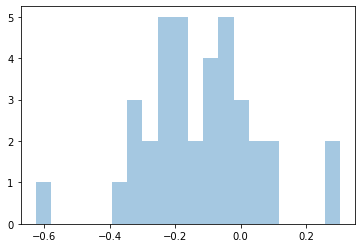

In [3144]:
seaborn.distplot(gcs[gcs>-1],kde=0,bins=20)


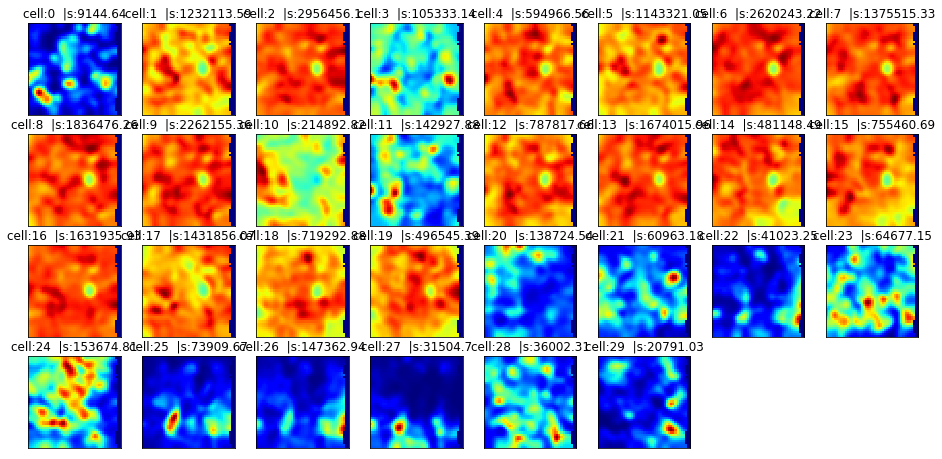

<Figure size 432x288 with 0 Axes>

In [3115]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 0
for ix in range(n64*64,(n64+1)*64):
    try:
        resp_map = all_rate_maps[ix]
        plt.subplot(8,8,kk)
        plt.title('cell:{}  |s:{}'.format(ix,np.round(np.sum(resp_map),decimals=2)))
        #resp_map = gaussian_filter(arr/occupancy_arr,30,mode='constant',truncate=2)
        #resp_map[np.isnan(resp_map)] = 0
        #print(np.max(resp_map))
        plt.imshow(resp_map,cmap='jet')#,vmin=.0,vmax=.2)
        #plt.xlim(50,1050)
        #plt.ylim(50,1050)
        plt.xticks([])
        plt.yticks([])

        kk += 1
    except Exception as e:
        if e==IndexError:
            break

plt.show()
plt.tight_layout()

In [3145]:
np.argsort(gcs[:,0])[::-1]

array([ 7,  4, 13, 28, 22, 12,  3, 26,  8, 29, 18, 14,  9, 34, 16,  2, 19,
       36,  5, 33, 35, 20,  1, 31, 25, 21, 24, 27, 11,  0, 15, 23,  6, 17,
       30, 32, 10])

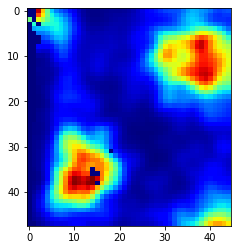

In [3449]:
#out = filter_nan_gaussian_david(all_rate_maps[7],0)
out = gaussian_filter(all_resp_arr[88][1],.0)[:-2,:-5]
plt.imshow(out,cmap='jet')


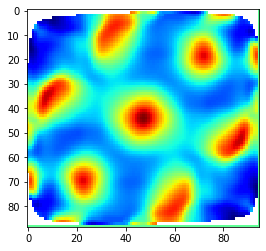

In [3450]:
out2 = get_rate_map_autocorrelogram(out)
plt.imshow(out2,cmap='jet')

In [3451]:
out3 = process_grid_data([(0,out,0,0)])

In [3452]:
out3

{'rate_map_autocorrelogram': [array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan,  0.],
         [nan, nan, nan, ..., nan, nan,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]])],
 'grid_spacing': [89.90841089871677],
 'field_size': [8.760753198730738],
 'grid_score': [0.8044324736918376]}

In [3204]:
spike_poss
positions_x = position[:,0]
positions_y = position[:,1]
smooth = 3
number_of_bins_x = number_of_bins_y = 50
bin_size_pixels=15.4
min_dwell=1
min_dwell_distance_pixels = 50
dt_position_ms = 1

In [1941]:
770/50

15.4

In [1875]:
acorr.shape

(99, 99)